In [29]:
import pandas as pd

In [4]:
#Data load and EDA
df=pd.read_csv('spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [30]:
df.Category.value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [32]:
X=df.Message
y=df.Category

In [39]:
#split the data set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [34]:
X[:3]

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
Name: Message, dtype: object

Feature Engineering:Convert text to Numbers

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
v=CountVectorizer()
X_train_count=v.fit_transform(X_train.values)
X_test_count=v.transform(X_test.values)

In [41]:
len(X_train_count.toarray()[0])

7705

Train the model Using Naive Bayes

In [42]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(X_train_count,y_train)


MultinomialNB()

Model Evaluation Precission and Recall ,F1 score

In [47]:
from sklearn.metrics import classification_report
y_pred=model.predict(X_test_count)
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

         ham       0.99      1.00      1.00       970
        spam       0.98      0.96      0.97       145

    accuracy                           0.99      1115
   macro avg       0.99      0.98      0.98      1115
weighted avg       0.99      0.99      0.99      1115



In [49]:
cm=confusion_matrix(y_test,y_pred)

In [51]:
cm

array([[967,   3],
       [  6, 139]])

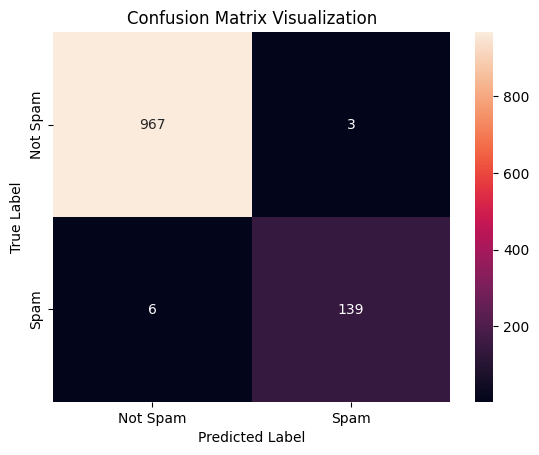

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm,annot=True, fmt="d",xticklabels=['Not Spam', 'Spam'],yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Visualization')
plt.show()

In [62]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]

emails_count=v.transform(emails)
predicted_email=model.predict(emails_count)
predicted_email

array(['ham', 'spam'], dtype='<U4')

Do the samething using Sklearn Pipeline

In [64]:
from sklearn.pipeline import Pipeline
pipe=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

In [67]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [69]:
y_pred = pipe.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         ham       0.99      1.00      1.00       970
        spam       0.98      0.96      0.97       145

    accuracy                           0.99      1115
   macro avg       0.99      0.98      0.98      1115
weighted avg       0.99      0.99      0.99      1115



In [71]:
pipe.predict(emails)

array(['ham', 'spam'], dtype='<U4')